In [2]:

import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
import pickle

In [3]:
truenews = pd.read_csv('./data/True.csv') 
#truenews.head()
fakenews = pd.read_csv('./data/Fake.csv') 
#fakenews.head()

In [4]:

truenews = truenews.drop([ "subject","date"], axis = 1)
fakenews = fakenews.drop([ "subject","date"], axis = 1)

In [5]:
truenews['result'] = 0
fakenews['result'] = 1

In [6]:
truenews.head()

,title,text,result
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,0
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,0
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,0
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,0
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,0


In [7]:
frames = [truenews, fakenews]
 
result = pd.concat(frames)

In [8]:
result.head()

,title,text,result
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,0
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,0
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,0
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,0
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,0


In [9]:
result['title'] = result['title'].map(lambda x:  x.lower())
result['text'] = result['text'].map(lambda x:  x.lower())

In [10]:
import numpy as np
msk = np.random.rand(len(result)) < 0.8
train = result[msk].copy()
test=result[~msk].copy()
print(test)

                                                   title  \
2      senior u.s. republican senator: 'let mr. muell...   
3      fbi russia probe helped by australian diplomat...   
11     new york governor questions the constitutional...   
14     man says he delivered manure to mnuchin to pro...   
16     u.s. lawmakers question businessman at 2016 tr...   
...                                                  ...   
23461  report: ‘federal government escalated the viol...   
23463  eyewitness says feds ambushed bundys, 100 shot...   
23468  ron paul on burns oregon standoff and jury nul...   
23475  hillary clinton: ‘israel first’ (and no peace ...   
23478  sunnistan: us and allied ‘safe zone’ plan to t...   

                                                    text  result  
2      washington (reuters) - the special counsel inv...       0  
3      washington (reuters) - trump campaign adviser ...       0  
11     new york/washington (reuters) - the new u.s. t...       0  
14      (in

In [11]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [12]:
def remove_punct(txt):
    text_remove_punct = [c for c in txt if c not in string.punctuation]
    return text_remove_punct

In [13]:
import re
def regular_expr(txt):
    txt = re.sub('[^a-zA-Z]',' ',str(txt))
    #txt = txt.split()
    return txt

In [14]:
#train['text'] = train['text'].map(lambda x:  remove_punct(x))
#test['text'] = test['text'].map(lambda x:  remove_punct(x))

train['text'] = train['text'].map(lambda x:  regular_expr(x))
test['text'] = test['text'].map(lambda x:  regular_expr(x))

In [15]:
#result['text'] = result['text'].map(lambda x:  regular_expr(x))

In [16]:
print(test['text'])

2        washington  reuters    the special counsel inv...
3        washington  reuters    trump campaign adviser ...
11       new york washington  reuters    the new u s  t...
14         in dec     story  in second paragraph  corre...
16       washington  reuters    a georgian american bus...
                               ...                        
23461     killed  rancher and protest spokesman robert ...
23463    patrick henningsen   st century wire update   ...
23468      st century wire says if you ve been followin...
23475    robert fantina counterpunchalthough the united...
23478    patrick henningsen    st century wireremember ...
Name: text, Length: 8878, dtype: object


In [17]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

def lemmatiz(txt):
    txt = lemmatizer.lemmatize(txt)
    #txt = txt.split()
    return txt


In [18]:
train['text'] = train['text'].map(lambda x:  lemmatiz(x))
test['text'] = test['text'].map(lambda x:  lemmatiz(x))

In [19]:
print(train['text'])

0        washington  reuters    the head of a conservat...
1        washington  reuters    transgender people will...
4        seattle washington  reuters    president donal...
5        west palm beach  fla  washington  reuters    t...
6        west palm beach  fla  reuters    president don...
                               ...                        
23474    paul craig robertsin the last years of the   t...
23476      st century wire says as   wire reported earl...
23477      st century wire says it s a familiar theme  ...
23479      st century wire says al jazeera america will...
23480      st century wire says as   wire predicted in ...
Name: text, Length: 36020, dtype: object


In [20]:
def regular_token(txt):
    #txt = re.sub('[^a-zA-Z]',' ',str(txt))
    txt = txt.split()
    return txt

In [21]:
#train['text'] = train['text'].map(lambda x:  regular_token(x))
#test['text'] = test['text'].map(lambda x:  regular_token(x))

In [22]:
print(train['text'])

0        washington  reuters    the head of a conservat...
1        washington  reuters    transgender people will...
4        seattle washington  reuters    president donal...
5        west palm beach  fla  washington  reuters    t...
6        west palm beach  fla  reuters    president don...
                               ...                        
23474    paul craig robertsin the last years of the   t...
23476      st century wire says as   wire reported earl...
23477      st century wire says it s a familiar theme  ...
23479      st century wire says al jazeera america will...
23480      st century wire says as   wire predicted in ...
Name: text, Length: 36020, dtype: object


In [38]:
from sklearn.feature_extraction.text import TfidfVectorizer
num_features=4900
tfidf = TfidfVectorizer(max_df=0.95, min_df=2, max_features=num_features,lowercase = False, ngram_range = (1,2))
x_train = tfidf.fit_transform(train['text'])
x_test = tfidf.transform(test['text'])
#print(tfidf.fit_transform(result['text'][0]))
#def regular_vectorize(txt):
#   return tfidf.fit_transform(txt)

In [24]:
pickle.dump(tfidf, open('./model/vectorizer.pkl','wb'))

In [25]:
#result['count'] = result['text'].map(lambda x:  regular_vectorize([x]))

In [26]:
print(x_test.shape)
print(x_train.shape)

(8878, 4900)
(36020, 4900)


In [27]:
print(result.count)

<bound method DataFrame.count of                                                    title  \
0      as u.s. budget fight looms, republicans flip t...   
1      u.s. military to accept transgender recruits o...   
2      senior u.s. republican senator: 'let mr. muell...   
3      fbi russia probe helped by australian diplomat...   
4      trump wants postal service to charge 'much mor...   
...                                                  ...   
23476  mcpain: john mccain furious that iran treated ...   
23477  justice? yahoo settles e-mail privacy class-ac...   
23478  sunnistan: us and allied ‘safe zone’ plan to t...   
23479  how to blow $700 million: al jazeera america f...   
23480  10 u.s. navy sailors held by iranian military ...   

                                                    text  result  
0      washington (reuters) - the head of a conservat...       0  
1      washington (reuters) - transgender people will...       0  
2      washington (reuters) - the special cou

In [84]:
from sklearn.naive_bayes import MultinomialNB 

clf = MultinomialNB()
y_train = train['result'].to_numpy()
clf.fit(x_train,y_train)
predict_test = clf.predict(x_test)

In [29]:
print(type(y_train))

<class 'numpy.ndarray'>


In [30]:
y_test = test['result'].to_numpy()

In [31]:
print(type(y_test))

<class 'numpy.ndarray'>


In [85]:
count = 0
for i in range(len(y_test)):
    if y_test[i] == predict_test[i]:
        count+=1
k = count/len(y_test)
print(f'Accuracy : {k}')

Accuracy : 0.9519035818878125


In [86]:
predict = clf.predict(x_train)

In [87]:
count = 0
for i in range(len(y_train)):
    if y_train[i] == predict[i]:
        count+=1
k = count/len(y_train)
print(f'Accuracy : {k}')

Accuracy : 0.9496390893947807


In [35]:
import pickle
pickle.dump(clf, open('./model/fake_news_nb.pkl','wb'))

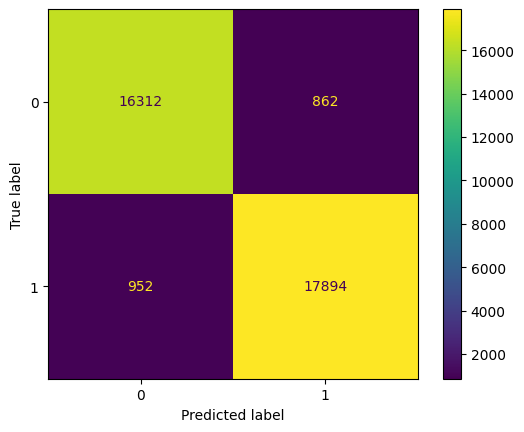

In [88]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
cm=confusion_matrix(y_train, predict)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=clf.classes_)
disp.plot()
plt.show()

In [79]:
######Training Accuracy
def accuracy_score(y_train,predict):
  count = 0
  True_Positive = 0
  True_Negative = 0
  False_Positive = 0
  False_Negative = 0
  for i in range(len(y_train)):
    if y_train[i] == predict[i]:
        if predict[i] == 1:
            True_Positive += 1
        else: 
            True_Negative += 1
    else:
        if predict[i] == 1:
            False_Positive += 1
        else: 
            False_Negative += 1
  precision = True_Positive/(True_Positive + False_Positive)
  recall = True_Positive/(True_Positive + False_Negative)
  f1 = 2 * precision * recall / (precision + recall)
  return (precision, recall, f1)

In [89]:
precision,recall,f1 = accuracy_score(y_train, predict)

print(f'Training Accuracy Naive Bayes Precision : {precision} Recall : {recall}, f1 : {f1}')

precision,recall,f1 = accuracy_score(y_test, predict_test)

print(f'Testing Accuracy Naive Bayes Precision : {precision} Recall : {recall}, f1 : {f1}')

Training Accuracy Naive Bayes Precision : 0.95404137342717 Recall : 0.949485301920832, f1 : 0.9517578852188714
Testing Accuracy Naive Bayes Precision : 0.9556084885231702 Recall : 0.9521035598705502, f1 : 0.9538528044958392


In [91]:
from sklearn.neural_network import MLPClassifier
y_train = train['result'].to_numpy()
mlp = MLPClassifier(hidden_layer_sizes=(8,8,8), activation='relu', solver='adam', max_iter=100)
x_train_array_1=x_train.toarray()
x_test_array_1=x_test.toarray()

mlp.fit(x_train_array_1, y_train)
predict_MLP_train=mlp.predict(x_train_array_1)

In [92]:
count = 0
for i in range(len(y_train)):
    if y_train[i] == predict_MLP_train[i]:
        count+=1
k = count/len(y_train)
print(f'Accuracy : {k}')

Accuracy : 0.9999722376457524


In [93]:
predict = mlp.predict(x_test.toarray())

In [94]:
count = 0
for i in range(len(y_test)):
    if y_test[i] == predict_test[i]:
        count+=1
k = count/len(y_test)
print(f'Accuracy : {k}')

Accuracy : 0.9519035818878125


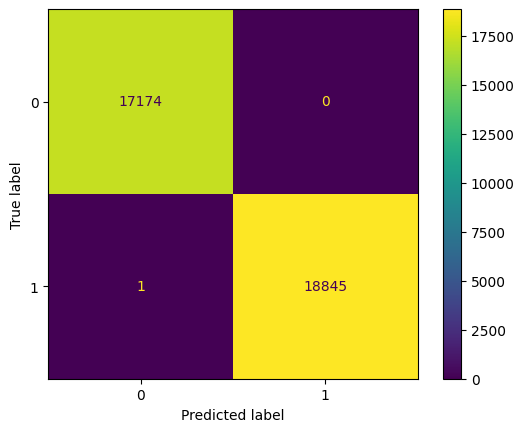

In [95]:
cm=confusion_matrix(y_train, predict_MLP_train)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=clf.classes_)
disp.plot()
plt.show()

In [146]:
precision,recall,f1 = accuracy_score(y_train, predict_MLP_train)

print(f'Training Accuracy NN Precision : {precision} Recall : {recall}, f1 : {f1}')

precision,recall,f1 = accuracy_score(y_test, predict)

print(f'Testing Accuracy NN Precision : {precision} Recall : {recall}, f1 : {f1}')

Training Accuracy NN Precision : 1.0 Recall : 0.9999469383423538, f1 : 0.9999734684672733
Testing Accuracy NN Precision : 0.9958918918918919 Recall : 0.9937432578209278, f1 : 0.994816414686825


Training Accuracy NN Precision : 0.9946027633851469 Recall : 0.9939590075512406, f1 : 0.9942807812668609


In [45]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling2D, Dropout, Flatten, Dense,BatchNormalization,Activation

In [68]:
#!pip3 install tensorflow

In [70]:
x_train_array = x_train.toarray().reshape(-1,70, 70,1)
print(x_train_array.shape)
x_test_array = x_test.toarray().reshape(-1,70, 70,1)
y_train
print(y_train.shape)

(35931, 70, 70, 1)
(35931,)


In [63]:
#model = Sequential()
#model.add(Dropout(0.2),input_shape=(1,70, 70, 1))
#model.add(Conv2D(10,(2, 2),input_shape=(1,70, 70, 1)))
#model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Flatten())
#model.add(Dense(128))
#model.add(BatchNormalization())
#model.add(Activation('relu'))   
#model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
#model.summary()

In [64]:
#model.fit(x_train_array,y_train,epochs=5)

In [105]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(x_train_array_1, y_train)
predict_gaussian = clf.predict(x_train_array_1)

In [106]:
count = 0
for i in range(len(y_train)):
    if y_train[i] == predict_gaussian[i]:
        count+=1
k = count/len(y_train)
print(f'Accuracy : {k}')



Accuracy : 0.9531093836757357


In [107]:

predict_gaussian_test = clf.predict(x_test_array_1)

In [108]:
count = 0
for i in range(len(y_test)):
    if y_test[i] == predict_gaussian_test[i]:
        count+=1
k = count/len(y_test)
print(f'Accuracy : {k}')

Accuracy : 0.9505519261094841


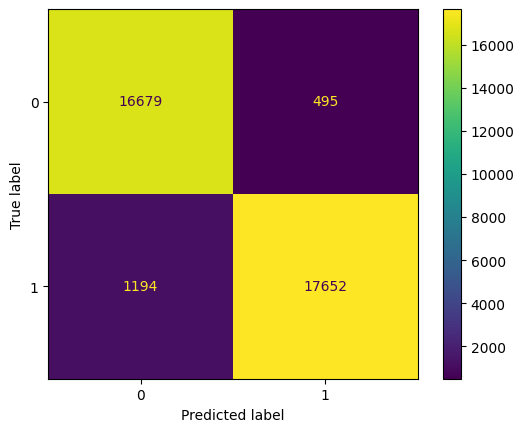

In [109]:
cm=confusion_matrix(y_train, predict_gaussian)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=clf.classes_)
disp.plot()
plt.show()

In [145]:
precision,recall,f1 = accuracy_score(y_train, predict_gaussian)

print(f'Training Accuracy Gaussian Precision : {precision} Recall : {recall}, f1 : {f1}')

precision,recall,f1 = accuracy_score(y_test, predict_gaussian_test)

print(f'Testing Accuracy Gaussian Precision : {precision} Recall : {recall}, f1 : {f1}')

Training Accuracy Gaussian Precision : 0.9727227640932385 Recall : 0.9366443807704553, f1 : 0.9543427134863351
Testing Accuracy Gaussian Precision : 0.9729486023444545 Recall : 0.9311758360302049, f1 : 0.9516040127880057


In [111]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(x_train_array_1, y_train)


KNeighborsClassifier(n_neighbors=3)

In [112]:
predict_neigh_train = neigh.predict(x_train_array_1)

In [114]:
count = 0
for i in range(len(y_train)):
    if y_train[i] == predict_neigh_train[i]:
        count+=1
k = count/len(y_train)
print(f'Accuracy : {k}')

Accuracy : 0.8053858967240421


In [115]:
predict_neigh_test = neigh.predict(x_test_array_1)

In [116]:
count = 0
for i in range(len(y_test)):
    if y_test[i] == predict_neigh_test[i]:
        count+=1
k = count/len(y_test)
print(f'Accuracy : {k}')

Accuracy : 0.7208830817751746


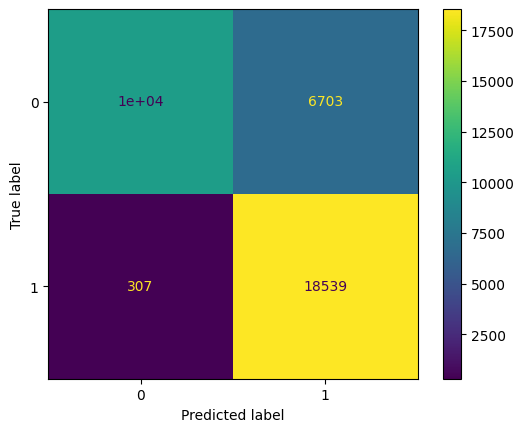

In [117]:
cm=confusion_matrix(y_train, predict_neigh_train)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=clf.classes_)
disp.plot()
plt.show()

In [144]:
precision,recall,f1 = accuracy_score(y_train, predict_neigh_train)

print(f'Training Accuracy KNN Precision : {precision} Recall : {recall}, f1 : {f1}')

precision,recall,f1 = accuracy_score(y_test, predict_neigh_test)

print(f'Testing Accuracy KNN Precision : {precision} Recall : {recall}, f1 : {f1}')

Training Accuracy KNN Precision : 0.7344505189763093 Recall : 0.9837100711026212, f1 : 0.8409998185447287
Testing Accuracy KNN Precision : 0.658859920459567 Recall : 0.9650485436893204, f1 : 0.7830882352941176


In [118]:
#!pip3 install wordcloud

In [126]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0).fit(x_train_array_1, y_train)
Predict_logitsic = clf.predict(x_train_array_1)

In [127]:
count = 0
for i in range(len(y_train)):
    if y_train[i] == Predict_logitsic[i]:
        count+=1
k = count/len(y_train)
print(f'Accuracy : {k}')

Accuracy : 0.9923098278734037


In [128]:
predict_logitsic_test = clf.predict(x_test_array_1)

In [129]:
count = 0
for i in range(len(y_test)):
    if y_test[i] == predict_logitsic_test[i]:
        count+=1
k = count/len(y_test)
print(f'Accuracy : {k}')

Accuracy : 0.9909889614778103


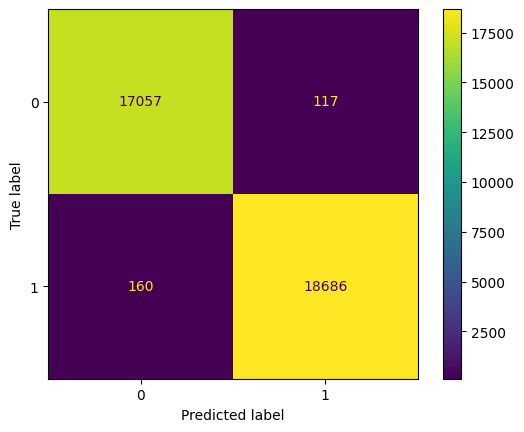

In [130]:
cm=confusion_matrix(y_train, Predict_logitsic)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=clf.classes_)
disp.plot()
plt.show()

In [143]:
precision,recall,f1 = accuracy_score(y_train, Predict_logitsic)

print(f'Training Accuracy Logistic Regression Precision : {precision} Recall : {recall}, f1 : {f1}')

precision,recall,f1 = accuracy_score(y_test, predict_logitsic_test)

print(f'Testing Accuracy Logistic Regression Precision : {precision} Recall : {recall}, f1 : {f1}')

Training Accuracy Logistic Regression Precision : 0.993777588682657 Recall : 0.9915101347766104, f1 : 0.9926425668676458
Testing Accuracy Logistic Regression Precision : 0.9930720935267374 Recall : 0.9896440129449838, f1 : 0.9913550896909445


In [134]:
from sklearn.decomposition import PCA
 
pca = PCA(n_components = 2)
 
X_train = pca.fit_transform(x_train_array_1)
X_test = pca.transform(x_test_array_1)

In [135]:
from sklearn import svm
cls = svm.SVC(kernel="linear")
y_train = train['result'].to_numpy()
cls.fit(X_train, y_train)

SVC(kernel='linear')

In [136]:
predict_SVM_train = cls.predict(X_train)

In [137]:
count = 0
for i in range(len(y_train)):
    if y_train[i] == predict_SVM_train[i]:
        count+=1
k = count/len(y_train)
print(f'Accuracy : {k}')

Accuracy : 0.8378956135480289


In [138]:
predict_SVM_test = cls.predict(X_test)

In [139]:
count = 0
for i in range(len(y_test)):
    if y_test[i] == predict_SVM_test[i]:
        count+=1
k = count/len(y_test)
print(f'Accuracy : {k}')

Accuracy : 0.8393782383419689


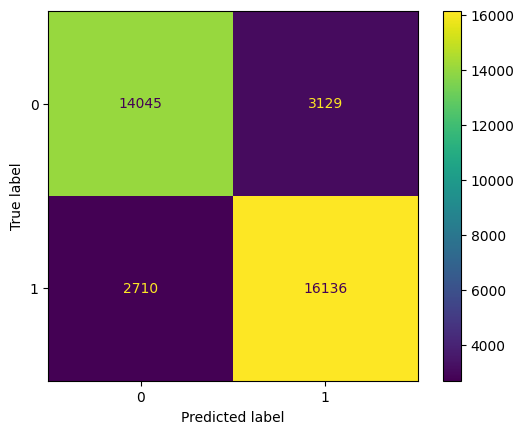

In [140]:
cm=confusion_matrix(y_train, predict_SVM_train)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=clf.classes_)
disp.plot()
plt.show()

In [142]:
precision,recall,f1 = accuracy_score(y_train, predict_SVM_train)

print(f'Training Accuracy SVM : {precision} Recall : {recall}, f1 : {f1}')

precision,recall,f1 = accuracy_score(y_test, predict_SVM_test)

print(f'Testing Accuracy SVM Precision : {precision} Recall : {recall}, f1 : {f1}')

Training Accuracy SVM : 0.8375811056319751 Recall : 0.856202907778839, f1 : 0.8467896407861247
Testing Accuracy SVM Precision : 0.8375762676204502 Recall : 0.8588996763754045, f1 : 0.8481039625053259
